Import Packages

In [1]:
import pandas as pd 
import numpy as np
import scipy.spatial
from scipy.spatial.distance import euclidean
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

Read the dataset csv file and store in dataframe

In [2]:
revised_Data = pd.read_csv("BSOM_DataSet_revised.csv")

In [3]:
revised_Data.head()

,Random_ID,O1_PI_01,O1_PI_02,O1_PI_03,O1_PI_04,O1_PI_05,O1_PI_06,O1_PI_07,O1_PI_08,O1_PI_09,...,all_PIs_avg_n131,BCR_NBME_final,B2E_NBME_final,O1_O2_NBME,SA_NBME,HA_final,HD_final,CBSE_01,CBSE_02,STEP_1
0,1008.0,0.90,0.6957,0.6364,0.7143,0.8333,0.8667,0.64,0.6522,0.2941,...,0.6623,0.81,0.83,0.70,0.74,0.82,0.95,42.0,68.0,233.0
1,1170.0,0.70,0.6087,0.7273,0.4762,0.2917,0.5333,0.56,0.4783,0.4118,...,0.6107,0.86,0.89,0.68,0.77,0.76,0.84,44.0,67.0,215.0
2,1292.0,0.75,0.6957,0.8182,0.6190,0.6250,0.7333,0.52,0.9130,0.3529,...,0.6798,0.85,0.86,0.83,0.71,0.90,0.88,41.0,78.0,243.0
3,1307.0,0.95,0.6957,0.7727,0.7619,0.8333,0.8667,0.80,0.6957,0.5882,...,0.7652,0.93,0.94,0.92,0.91,0.96,0.91,68.0,91.0,248.0
4,1311.0,0.80,0.6522,0.7727,0.6667,0.5417,0.6667,0.76,0.7391,0.6471,...,0.6772,0.88,0.83,0.83,0.88,0.88,0.83,57.0,74.0,228.0


Get the 3 features, 4 features and 5 features from the dataset 

In [4]:
specificdata = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final']]
four_featured_Data = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final','all_irats_avg_n34']]
five_featured_Data = revised_Data.loc[:,['all_NBME_avg_n4','all_PIs_avg_n131','HD_final','all_irats_avg_n34','HA_final']]

In [5]:
four_featured_Data.head()
five_featured_Data.head()

,all_NBME_avg_n4,all_PIs_avg_n131,HD_final,all_irats_avg_n34,HA_final
0,0.7700,0.6623,0.95,0.7356,0.82
1,0.8000,0.6107,0.84,0.6134,0.76
2,0.8125,0.6798,0.88,0.6762,0.90
3,0.9250,0.7652,0.91,0.7949,0.96
4,0.8550,0.6772,0.83,0.7169,0.88


In [6]:
X = specificdata.values
X1 = four_featured_Data.values
X2 = five_featured_Data.values

In [7]:
num_of_data, X_features = X.shape
num_of_data, X1_features = X.shape
num_of_data, X2_features = X.shape

In [8]:
def cluster_centroids(X,clusters,k):
    result = np.empty(shape=(k,) + X.shape[1:])
    for i in range(k):
        np.mean(X[clusters == i], axis=0, out=result[i])
    return result

# Question 1a.
Steps
1. Randomly select initial centroids for each cluster 
2. Convergence is achieved when centroid of current and
3. previous iteration are almost closer(very small number of tolerance like 10pow(-4))
4. Within the loop, Squared distances between centriods and data are calculated
5. Closest centroid is choosen for data point
6. Centroids are updated by taking mean of all distance. 

In [9]:

k=3
np.random.seed(300)
centroids = np.zeros((k,X_features), dtype = np.float64)
centroids =X[np.random.choice(np.arange(len(X)), k, False)]
max_iterations =100
for i in range(max_iterations):
        # Distances between each point and each centroid.
        dists = scipy.spatial.distance.cdist(centroids, X, 'euclidean')
        clusterss = np.argmin(dists, axis=0)
        new_centroids = cluster_centroids(X, clusterss, k)
        if np.allclose(new_centroids, centroids):
            print("centroids after converging:", new_centroids)
            break
        centroids = new_centroids
print(clusterss)

centroids after converging: [[0.87121951 0.72460732 0.92073171]
 [0.81019608 0.63046078 0.82803922]
 [0.71326087 0.54484783 0.69521739]]
[0 1 1 0 1 1 2 1 2 0 1 1 0 1 0 1 1 1 2 0 0 2 0 0 0 1 0 0 0 2 1 2 0 1 0 0 1
 1 1 1 1 0 2 1 1 0 2 0 1 2 1 1 2 1 0 2 2 0 0 0 1 0 2 0 0 2 2 2 0 1 2 2 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 2 0 1 1 1 0 1 2 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 0 1 1]


Question 1a figure'K-means Clustering for 3 clusters'

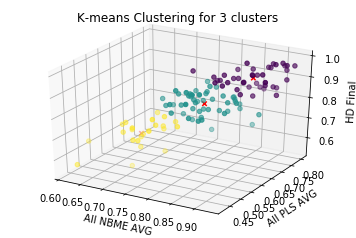

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.set_xlabel('All NBME AVG')
ax.set_ylabel('All PLS AVG')
ax.set_zlabel('HD Final')
ax.set_title('K-means Clustering for 3 clusters')
ax.scatter3D(x,y,z, c=clusterss,s=20)
ax.scatter3D(centroids[:,0],centroids[:,1],centroids[:,2],marker='x',color='r')

# Question 1c DaviesBouldin function

In [11]:
def DaviesBouldin(X, Labels):
    n_cluster = len(np.bincount(Labels)) 
    cluster_k = [X[Labels == k] for k in range(n_cluster)] 
    centroids = [np.mean(k, axis = 0) for k in cluster_k] 
    
    #dist from all points and centroids within each cluster
    variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)] 
    r = []
    rmax = []
    #Intracluster distance / Intercluster distance 
    for i in range(n_cluster):
        for j in range(n_cluster):
            if j != i:
                r.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))
              
        rmax.append(np.max(r))
        r.clear()
        
    #sum of Rij max /num of clusters       
    
    db = (1/n_cluster)*(sum(rmax))
    return(db)


DBI for 3 clusters

In [12]:
DaviesBouldin(X, clusterss)

0.8399436766064587

# Question 1b

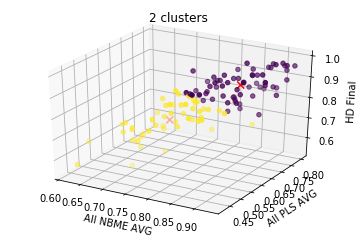

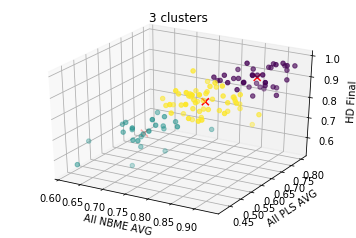

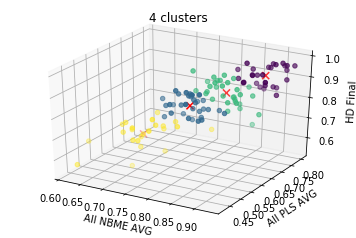

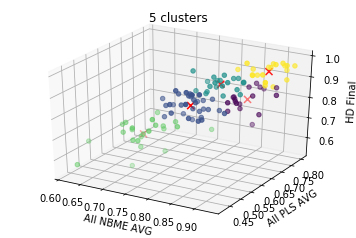

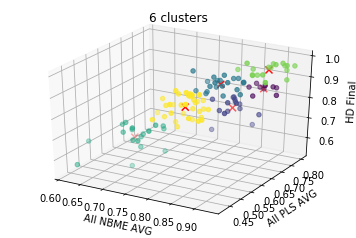

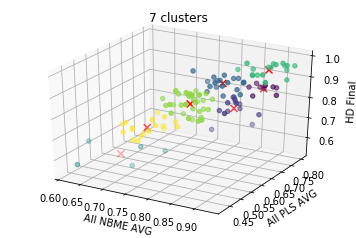

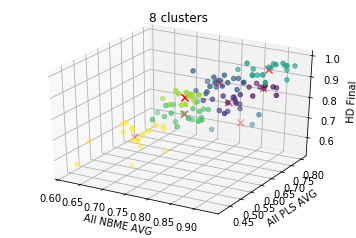

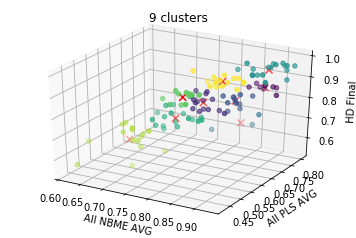

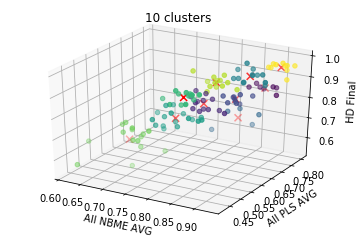

In [13]:
titles = ['2 clusters','3 clusters','4 clusters','5 clusters','6 clusters','7 clusters','8 clusters','9 clusters','10 clusters']
fig_num=1
Daviesindex_for_3 =[]
for k in range(2,11):
    np.random.seed(1400)
    centroids = np.zeros((k,X_features), dtype = np.float64)
    centroids =X[np.random.choice(np.arange(len(X)), k, False)]
    max_iterations =100
    for _ in range(max(max_iterations, 1)):
        # Distances between each point and each centroid.
        dists = scipy.spatial.distance.cdist(centroids, X, 'euclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(dists, axis=0)

        new_centroids = cluster_centroids(X, clusters, k)
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = X[:,0]
    y = X[:,1]
    z = X[:,2]
    ax.set_xlabel('All NBME AVG')
    ax.set_ylabel('All PLS AVG')
    ax.set_zlabel('HD Final')
    ax.set_title(titles[fig_num - 1])
    ax.scatter3D(x,y,z, c=clusters,s=20)
    ax.scatter3D(centroids[:,0],centroids[:,1],centroids[:,2],marker='x',color='r', s=50)
    fig_num=fig_num+1
    Daviesindex_for_3.append(DaviesBouldin(X,clusters))
    

# Question 1c DB validity Measure

Davies index for 3 features from k=2 to 10 :  [0.8361969521027511, 0.8283853976267831, 1.0544353622884346, 0.8880260866458065, 0.9029982946395885, 0.9378052324852735, 0.9301516222940234, 0.9266630698482502, 0.9424895553788771]


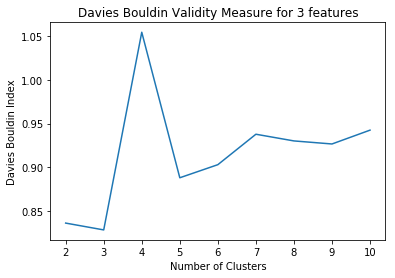

In [14]:

k=[2,3,4,5,6,7,8,9,10]
print("Davies index for 3 features from k=2 to 10 : ",Daviesindex_for_3)
plt.plot(k,Daviesindex_for_3)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Index')
plt.title('Davies Bouldin Validity Measure for 3 features')
plt.show()


# Question 2a (Four features) 

In [15]:

titles = ['2 clusters','3 clusters','4 clusters','5 clusters','6 clusters','7 clusters','8 clusters','9 clusters','10 clusters']
fig_num=1
Daviesindex_for_4 =[]
for k in range(2,11):
    np.random.seed(1400)
    centroids = np.zeros((k,X1_features), dtype = np.float64)
    centroids =X1[np.random.choice(np.arange(len(X1)), k, False)]
    max_iterations =100
    for _ in range(max(max_iterations, 1)):
        # Distances between each point and each centroid.
        dists = scipy.spatial.distance.cdist(centroids, X1, 'euclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(dists, axis=0)

        new_centroids = cluster_centroids(X1, clusters, k)
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
  
    Daviesindex_for_4.append(DaviesBouldin(X1,clusters))

Question 2a (Davies Bouldin Validity Measure for 4 features)

Davies index for 4 features from k=2 to 10 :  [0.8479071099001925, 0.9321719665326081, 1.0356652283385022, 1.1533806977182353, 1.1165417524702899, 1.1778802064100504, 1.1483813654119288, 1.2190573310238182, 1.143059927043281]


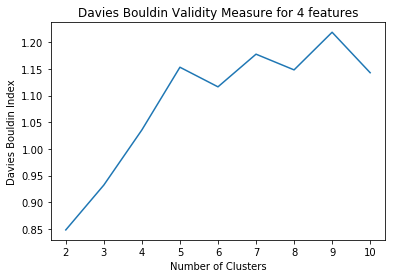

In [16]:

k=[2,3,4,5,6,7,8,9,10]
print("Davies index for 4 features from k=2 to 10 : ",Daviesindex_for_4)
plt.plot(k,Daviesindex_for_4)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Index')
plt.title('Davies Bouldin Validity Measure for 4 features')
plt.show()

# Question 2b

In [17]:

titles = ['2 clusters','3 clusters','4 clusters','5 clusters','6 clusters','7 clusters','8 clusters','9 clusters','10 clusters']
fig_num=1
Daviesindex_for_5 =[]
for k in range(2,11):
    np.random.seed(300)
    centroids = np.zeros((k,X2_features), dtype = np.float64)
    centroids =X2[np.random.choice(np.arange(len(X2)), k, False)]
    max_iterations =100
    for _ in range(max(max_iterations, 1)):
        # Squared distances between each point and each centroid.
        sqdists = scipy.spatial.distance.cdist(centroids, X2, 'sqeuclidean')

        # Index of the closest centroid to each data point.
        clusters = np.argmin(sqdists, axis=0)

        new_centroids = cluster_centroids(X2, clusters, k)
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    
    Daviesindex_for_5.append(DaviesBouldin(X2,clusters))

# Question 2b (Davies Bouldin Validity Measure for 5 features)

Davies index for 5 features from k=2 to 10 :  [0.908626714469095, 1.066977458339136, 1.1990407419774414, 1.2924792777704202, 1.3146643704023153, 1.2775089237082329, 1.2638396777011018, 1.365103416777248, 1.2976372108234153]


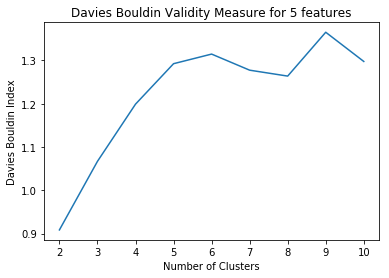

In [18]:

k=[2,3,4,5,6,7,8,9,10]
print("Davies index for 5 features from k=2 to 10 : ",Daviesindex_for_5)
plt.plot(k,Daviesindex_for_5)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Index')
plt.title('Davies Bouldin Validity Measure for 5 features')
plt.show()

3 clusters 4 features 

In [19]:
k=3
np.random.seed(300)
centroids = np.zeros((k,X1_features), dtype = np.float64)
centroids =X1[np.random.choice(np.arange(len(X1)), k, False)]
max_iterations =100
for i in range(max_iterations):
        # Squared distances between each point and each centroid.
        dists = scipy.spatial.distance.cdist(centroids, X1, 'euclidean')
        clusters4 = np.argmin(dists, axis=0)
        new_centroids = cluster_centroids(X1, clusters4, k)
        if np.allclose(new_centroids, centroids):
            print("centroids after converging:", new_centroids)
            break
        centroids = new_centroids


centroids after converging: [[0.87134615 0.7296     0.91666667 0.76588974]
 [0.809      0.62752909 0.83218182 0.66869091]
 [0.7127381  0.54406667 0.68809524 0.6024619 ]]


3 clusters 5 features 

In [20]:
k=3
np.random.seed(300)
centroids = np.zeros((k,X2_features), dtype = np.float64)
centroids =X2[np.random.choice(np.arange(len(X2)), k, False)]
max_iterations =100
for i in range(max_iterations):
        # Squared distances between each point and each centroid.
        sqdists = scipy.spatial.distance.cdist(centroids, X2, 'euclidean')
        clusters5 = np.argmin(sqdists, axis=0)
        new_centroids = cluster_centroids(X2, clusters5, k)
        if np.allclose(new_centroids, centroids):
            print("centroids after converging:", new_centroids)
            break
        centroids = new_centroids


centroids after converging: [[0.88658333 0.74163667 0.92       0.77693667 0.90133333]
 [0.82255102 0.64854694 0.85714286 0.68651429 0.83265306]
 [0.73729167 0.56572222 0.7325     0.62089167 0.72666667]]


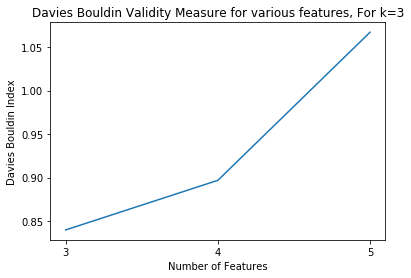

In [22]:
Num_features = [3,4,5]
Daviesindex_for_features=[]
Daviesindex_for_features.append(DaviesBouldin(X,clusterss))
Daviesindex_for_features.append(DaviesBouldin(X1,clusters4))
Daviesindex_for_features.append(DaviesBouldin(X2,clusters5))
plt.plot(Num_features,Daviesindex_for_features)
plt.xticks([3,4,5])
plt.xlabel('Number of Features')
plt.ylabel('Davies Bouldin Index')
plt.title('Davies Bouldin Validity Measure for various features, For k=3')
plt.show()